# Análise: Safismo sob diferentes visões

O objetivo desta análise foi comparar as principais diferenças da forma de representação da homossexualidade feminina entre roteiros escritos por homens e por mulheres queer. 

### Bibliotecas

In [2]:
import PyPDF2
import spacy
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from gensim import models, corpora
from gensim import similarities

### Corpus

O corpus escolhido contém 10 filmes com temática sáfica separados em dois grupos:

- Roteirizados por homens:
    - The Favourite (2018)
    - Duck Butter (2018)
    - The Prom (2020)
    - Blue is the Warmest Color (2013)
    - Disobedience (2017)
    
<br>

- Roteirizados por mulheres queer:
    - Carol (2015)
    - Bottoms (2023)
    - Booksmart (2019)
    - The Half of It (2020)
    - Portrait of a Lady on Fire (2019)

In [3]:
# Roteiro: Blue is the Warmest Color
with open('bitwc_tscript.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    bitwc_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        bitwc_text += pagina.extract_text()
        
        
# Roteiro: Disobedience
with open('disobedience_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    disobedience_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        disobedience_text += pagina.extract_text()
        

# Roteiro: Carol
with open('carol_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    carol_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        carol_text += pagina.extract_text()
        
        
# Roteiro: Bottoms
with open('bottoms_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    bottoms_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        bottoms_text += pagina.extract_text()
        
        
# Roteiro: The Favourite
with open('tf_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    tf_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        tf_text += pagina.extract_text()
        

# Roteiro: The Prom
with open('tp_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    tp_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        tp_text += pagina.extract_text()
        
        
# Roteiro: Booksmart
with open('booksmart_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    booksmart_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        booksmart_text += pagina.extract_text()
        

# Roteiro: Portrait of a Lady on Fire
with open('poalof_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    poalof_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        poalof_text += pagina.extract_text()
        
        
# Roteiro: Duck Butter
with open('db_tscript.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    db_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        db_text += pagina.extract_text()
        
        
# Roteiro: The Half of It
with open('thoi_script.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    thoi_text = ""
    for i in range(len(reader.pages)):
        pagina = reader.pages[i]
        thoi_text += pagina.extract_text()

### Análise através de Word2Vec

- **Roteiristas homens:**

In [4]:
# Executando pré-processamento e instanciando o modelo:

texto = tp_text + disobedience_text + tf_text + bitwc_text + db_text

nlp = spacy.load("en_core_web_sm")

corpus = nlp(texto)

def improved_filter(tokenized_doc):
    return [t.lemma_.lower() for t in tokenized_doc if
            t.is_alpha and \
            not t.is_punct and \
            not t.is_space and \
            not t.is_stop and \
            t.pos_ in ['ADJ']]

tokenized_sentences = []
for sent in corpus.sents:
    tokens = improved_filter(sent)
    if len(tokens) > 0:
        tokenized_sentences.append(tokens)

model_h = Word2Vec(sentences=tokenized_sentences, vector_size=200, window=5, min_count=1, workers=4)

c:\venv\ilumpy\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\venv\ilumpy\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


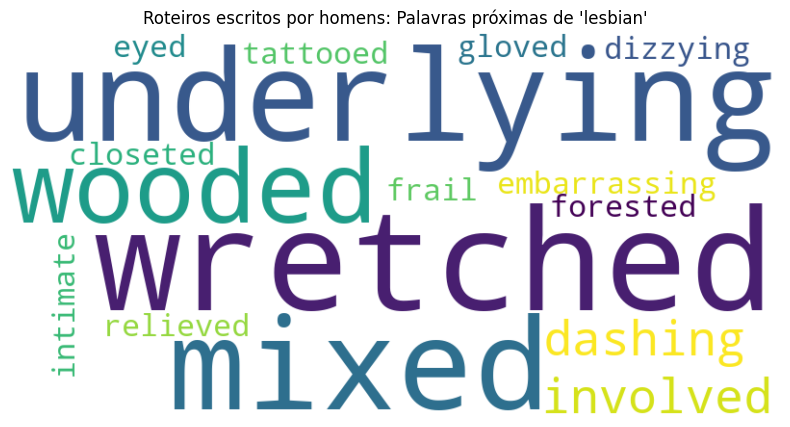

In [5]:
# Verificando as palavras mais próximas da escolhida:

chosen_word = "lesbian"
if chosen_word in model_h.wv.key_to_index:
    similar_words = model_h.wv.most_similar(chosen_word, topn=100)
else:
    raise ValueError(f'Token "{chosen_word}" não está no vocabulário do modelo treinado.')

output_vectors = [model_h.wv[chosen_word]]
words_to_visualize = [chosen_word]
for word, _ in similar_words:
    output_vectors.append(model_h.wv[word])
    words_to_visualize.append(word)

output_vectors = np.array(output_vectors)

perplexity = 5
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
vectors_2d = tsne.fit_transform(output_vectors)

similar_words_list = [word[0] for word in similar_words if nlp(word[0])[0].pos_ == 'VERB']

filtered_text = " ".join(similar_words_list)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Roteiros escritos por homens: Palavras próximas de 'lesbian'")
plt.show()

- **Roteiristas mulheres:**

In [6]:
# Executando pré-processamento e instanciando o modelo:

texto = carol_text + thoi_text + poalof_text + booksmart_text + bottoms_text

nlp = spacy.load("en_core_web_sm")

corpus = nlp(texto)

def improved_filter(tokenized_doc):
    return [t.lemma_.lower() for t in tokenized_doc if
            t.is_alpha and \
            not t.is_punct and \
            not t.is_space and \
            not t.is_stop and \
            t.pos_ in ['ADJ']]

tokenized_sentences = []
for sent in corpus.sents:
    tokens = improved_filter(sent)
    if len(tokens) > 0:
        tokenized_sentences.append(tokens)

model_m = Word2Vec(sentences=tokenized_sentences, vector_size=200, window=5, min_count=1, workers=4)

c:\venv\ilumpy\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\venv\ilumpy\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


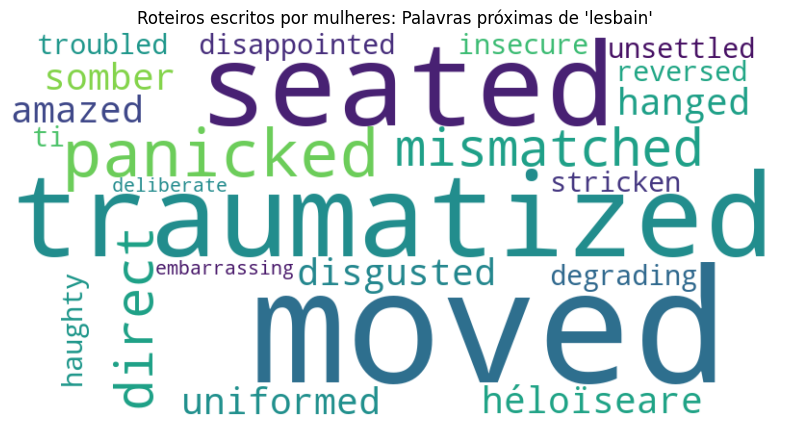

In [7]:
# Verificando as palavras mais próximas da escolhida:

chosen_word = "lesbian"
if chosen_word in model_m.wv.key_to_index:
    similar_words = model_m.wv.most_similar(chosen_word, topn=100)
else:
    raise ValueError(f'Token "{chosen_word}" não está no vocabulário do modelo treinado.')

output_vectors = [model_m.wv[chosen_word]]
words_to_visualize = [chosen_word]
for word, _ in similar_words:
    output_vectors.append(model_m.wv[word])
    words_to_visualize.append(word)

output_vectors = np.array(output_vectors)

perplexity = 5
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
vectors_2d = tsne.fit_transform(output_vectors)

similar_words_list = [word[0] for word in similar_words if nlp(word[0])[0].pos_ == 'VERB']

filtered_text = " ".join(similar_words_list)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Roteiros escritos por mulheres: Palavras próximas de 'lesbain'")
plt.show()